In [1]:
from bs4 import BeautifulSoup
import requests
import time
import datetime

import smtplib

# reading data

In [2]:
def reading_Amazon_data(URLs):
    titles=[]
    prices=[]
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
    for i in URLs:
        page = requests.get(i, headers=headers)

        soup1 = BeautifulSoup(page.content, "html.parser")

        soup2 = BeautifulSoup(soup1.prettify(), "html.parser")

        title = soup2.find(id='productTitle').get_text()
        titles.append(title)
        price = soup2.find(id='priceblock_ourprice').get_text()
        prices.append(price)
    return titles,prices

In [3]:
URLs = ['https://www.amazon.com/dp/B00NMFYNLM/ref=sspa_dk_detail_0?psc=1&pd_rd_i=B00NMFYNLM&pd_rd_w=Ce1B7&pf_rd_p=5d846283-ed3e-4512-a744-a30f97c5d738&pd_rd_wg=KZVK9&pf_rd_r=33JR68TFED2ZDT520Y6E&pd_rd_r=01c87b7e-bd04-47f5-bb7c-b6aad0aede94&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUEzMFpOWEtHNUlTNEJUJmVuY3J5cHRlZElkPUEwNTA3NjU1MjdMTEVEU0JGTUM3UiZlbmNyeXB0ZWRBZElkPUEwNDkxMDQwMTY1U1NPQzUwSkc4TSZ3aWRnZXROYW1lPXNwX2RldGFpbF90aGVtYXRpYyZhY3Rpb249Y2xpY2tSZWRpcmVjdCZkb05vdExvZ0NsaWNrPXRydWU=','https://www.amazon.com/dp/B082PH9VXQ/ref=sspa_dk_detail_0?psc=1&pd_rd_i=B082PH9VXQ&pd_rd_w=JNLX6&pf_rd_p=5d846283-ed3e-4512-a744-a30f97c5d738&pd_rd_wg=1R08f&pf_rd_r=DPFAQCFPAPTG8KYHN4CN&pd_rd_r=64055df0-d222-4685-958b-f911382f472f&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUEzTzFaVkZGSEoxRVAmZW5jcnlwdGVkSWQ9QTA2MDE5OTEySDE1RDJBU1k4WVcmZW5jcnlwdGVkQWRJZD1BMDU3NDM2NUc4SjhWVE4zMFNKWSZ3aWRnZXROYW1lPXNwX2RldGFpbF90aGVtYXRpYyZhY3Rpb249Y2xpY2tSZWRpcmVjdCZkb05vdExvZ0NsaWNrPXRydWU=','https://www.amazon.com/dp/B00HWEHPSC/ref=sspa_dk_detail_2?psc=1&pd_rd_i=B00HWEHPSC&pd_rd_w=DDuRM&pf_rd_p=5d846283-ed3e-4512-a744-a30f97c5d738&pd_rd_wg=3Uy7d&pf_rd_r=W6V5CSN6VYC6FEAPK0RC&pd_rd_r=2d90510b-3ce4-40cd-b6c3-b358bfb814ca&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUEyMFpTMVkxR1hQTTdKJmVuY3J5cHRlZElkPUEwMDQ2MDI2MVBWSFlQSTVLNEFYJmVuY3J5cHRlZEFkSWQ9QTA2MjExMTYzQ01JWU0ySTJKWEUxJndpZGdldE5hbWU9c3BfZGV0YWlsX3RoZW1hdGljJmFjdGlvbj1jbGlja1JlZGlyZWN0JmRvTm90TG9nQ2xpY2s9dHJ1ZQ==','https://www.amazon.com/dp/B07HSNKT7H/ref=sspa_dk_detail_2?psc=1&pd_rd_i=B07HSNKT7H&pd_rd_w=6uaZu&pf_rd_p=5d846283-ed3e-4512-a744-a30f97c5d738&pd_rd_wg=QEkYI&pf_rd_r=XABHXG1V91C313AMT5ZG&pd_rd_r=e8f6a8e5-e842-420d-9aeb-6b32238f28b3&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUExQ1ZJQTNGNFhYWTVHJmVuY3J5cHRlZElkPUEwNzUyMjkzMlNUNjNFT1JBUFhSSyZlbmNyeXB0ZWRBZElkPUEwNjk0ODg3Mk0zRExaUTk3MFRYNCZ3aWRnZXROYW1lPXNwX2RldGFpbF90aGVtYXRpYyZhY3Rpb249Y2xpY2tSZWRpcmVjdCZkb05vdExvZ0NsaWNrPXRydWU=','https://www.amazon.com/dp/B07XF78PW6/ref=sspa_dk_detail_3?psc=1&pd_rd_i=B07XF78PW6&pd_rd_w=fBwBf&pf_rd_p=5d846283-ed3e-4512-a744-a30f97c5d738&pd_rd_wg=BSNXw&pf_rd_r=X8HHG711K1E1BTCQ4818&pd_rd_r=93403270-a48d-4329-a8ff-95161cadde32&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUFGN1BFNjdSR1IxQjUmZW5jcnlwdGVkSWQ9QTA3Mzk3NDFaUzdFWDJOSlUwSVAmZW5jcnlwdGVkQWRJZD1BMDIyODUzNTJLTEdZSk9NNk9GV0kmd2lkZ2V0TmFtZT1zcF9kZXRhaWxfdGhlbWF0aWMmYWN0aW9uPWNsaWNrUmVkaXJlY3QmZG9Ob3RMb2dDbGljaz10cnVl','https://www.amazon.com/Important-Choices-Video-Funny-Player/dp/B07YYXTW5G/ref=pd_di_sccai_7/131-1246388-7784647?pd_rd_w=y2duI&pf_rd_p=c9443270-b914-4430-a90b-72e3e7e784e0&pf_rd_r=JKA27M91DXNJ7NWBMKSB&pd_rd_r=1a72e0a4-1e7f-4a3d-a058-7ef766c735ee&pd_rd_wg=ScNjW&pd_rd_i=B07YYXTW5G&psc=1','https://www.amazon.com/Headset-Gaming-Funny-T-Shirt-Gamer/dp/B08RCLDLW8/ref=pd_di_sccai_4/131-1246388-7784647?pd_rd_w=YYTgL&pf_rd_p=c9443270-b914-4430-a90b-72e3e7e784e0&pf_rd_r=G01094Y9XHZ7YGYAGYAT&pd_rd_r=a36c1e09-0688-4f7e-8d56-d54d75d2bba9&pd_rd_wg=5gqFy&pd_rd_i=B08RCLDLW8&psc=1']
titles,prices=reading_Amazon_data(URLs)


# removing white spaces and \n

In [4]:
for i in range(len(prices)):
    
    prices[i]=prices[i].strip()

In [5]:
for i in range(len(titles)):
    
    titles[i]=titles[i].strip()

In [6]:
titles

["I'm Not Anti-Social I'm Selectively Cool Sarcastic Novelty Graphic Funny T Shirt",
 "You're Overreacting | Chemistry Humor, Funny Science Teacher Pun Women's T-Shirt",
 'Never Trust an Atom, They Make Up Everything | Funny Science Unisex Graphic T-Shirt',
 'Market Trendz Well Thats Not A Good Sign Funny T Shirts for Men | Graphic Tee',
 'Market Trendz I Paused My Game to Be Here T Shirt Video Game Shirts for Men',
 'Life is Full of Important Choices Video Funny T Shirt Games Gamer Player Tops Tees for Men',
 "Headset Can't Hear You I'm Gaming Funny T-Shirt Gamer Video Game Tops Tees for Men"]

In [7]:
prices

['$16.99', '$16.95', '$15.95', '$18.95', '$17.95', '$14.95', '$12.95']

# adding Data into Dataframe

In [8]:
import pandas as pd

In [9]:
df=pd.DataFrame(titles,columns=['titles'])

In [10]:
df['prices']=prices

In [11]:
removing_dollar=df['prices']

In [12]:
for i in range(len(removing_dollar)):
    removing_dollar[i]=removing_dollar[i][1:]

In [13]:
df['prices']=removing_dollar

In [14]:
df

,titles,prices
0,I'm Not Anti-Social I'm Selectively Cool Sarca...,16.99
1,"You're Overreacting | Chemistry Humor, Funny S...",16.95
2,"Never Trust an Atom, They Make Up Everything |...",15.95
3,Market Trendz Well Thats Not A Good Sign Funny...,18.95
4,Market Trendz I Paused My Game to Be Here T Sh...,17.95
5,Life is Full of Important Choices Video Funny ...,14.95
6,Headset Can't Hear You I'm Gaming Funny T-Shir...,12.95


# plotting dataset

In [15]:
import matplotlib.pyplot as plot

([<matplotlib.axis.XTick at 0x1fa75a9fe80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

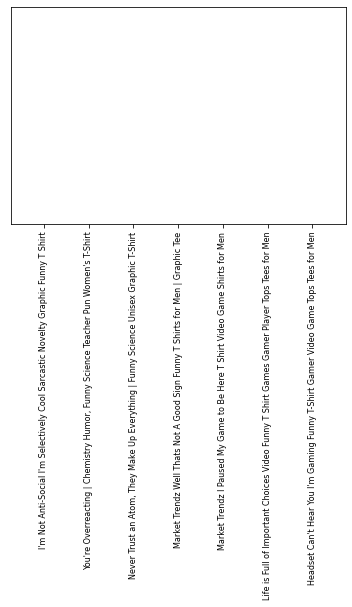

In [16]:

plot.bar(df['titles'],df['prices'])
plot.ylim(10,20)
plot.xticks(df['titles'],rotation='vertical',size=8)

In [17]:
df['prices']=df['prices'].astype('float')

In [18]:
df['prices'].mean()

16.384285714285717